In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing

In [23]:
data=pd.read_csv('spam.csv')
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data.shape

(5572, 2)

Dataset contain 2 columns and 5572 rows

# Data Cleaning

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
missing_val=data.isna().sum()
duplicate_value=data.duplicated().sum()
print(f'Dataset contain null values:\n{missing_val}')
print(f'Sum of duplicate values:{duplicate_value}')

Dataset contain null values:
Category    0
Message     0
dtype: int64
Sum of duplicate values:415


DataSet contain no null value but there have 415 duplicates value. So first remove duplicate value

In [27]:
clean_data=data.drop_duplicates(keep='first')
clean_data.duplicated().sum()

0

In [28]:
clean_data.shape

(5157, 2)

# Label Encoding

In [29]:
encode=LabelEncoder()
clean_data['Category']=encode.fit_transform(clean_data['Category'])
clean_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


With the help of label encoding, it convert ham into 0 and spam into 1

In [30]:
clean_data.dtypes

Category     int32
Message     object
dtype: object

Write Function which transform text into:
- lower case
- remove special character
- tokenization
- remove stop words
- stemming

In [31]:
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer

In [32]:
def text_transform(text):
    #lower case
    text=text.lower()
    
    #remove special character
    text=re.sub(r'[^a-zA-Z0-9\s]','',text)
    
    #tokenization
    text=nltk.word_tokenize(text)
    
    #stemming
    stemmer=PorterStemmer()
    text=[stemmer.stem(word) for word in text]
    
    return ' '.join(text)
    

In [33]:
trans_data=clean_data.copy()

In [34]:
trans_data['Transform_text']=clean_data['Message'].apply(text_transform)
trans_data.head()

,Category,Message,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goe to usf he live around ...


# EDA

In [35]:
trans_data.describe()

,Category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


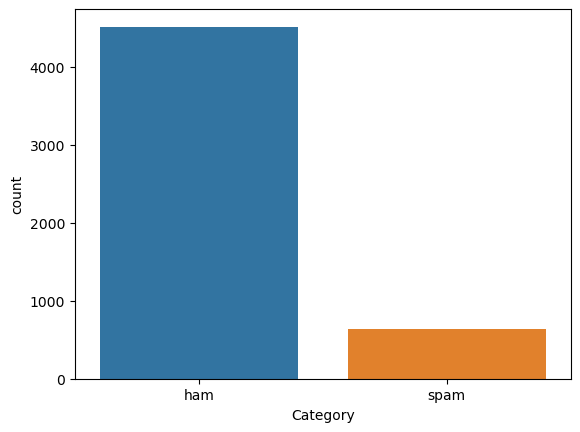

In [36]:
sns.countplot(x='Category', data=trans_data)
plt.xticks([0,1],labels=['ham','spam'])
plt.show()

- The graph show most frequent label in the Category column is ham. It indicated by 4516 out of 5157 messages being labeled as ham.
- Message Uniqueness: Every message in your dataset is unique, meaning there are no duplicate messages.
- This graph also show data is imblanced

# Feature Selection

In [37]:
# Applied featue extraction on text message to finf frquency matrix for data modeling
#feature_extraction = TfidfVectorizer(min_df=1,stop_words='english')
feature_extraction =CountVectorizer(min_df=1,stop_words='english')

# Spam Filter Algorithms

In [38]:
#split dataset into traget and feature data
x = feature_extraction.fit_transform(trans_data['Transform_text']) 
y=trans_data['Category']

In [39]:
#Convert sparse matrix to dense (for GaussianNB)
x_dense = x.toarray()

In [40]:
# Split data into 70% training & 30% testing data sets
x_train,x_test,y_train,y_test=train_test_split(x_dense,y,test_size=0.3,random_state=3)

In [41]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5157, 7959)
(3609, 7959)
(1548, 7959)


In [42]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5157,)
(3609,)
(1548,)


In [43]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Data Modeling


In [44]:
Gaussian_model=GaussianNB()
Gaussian_model.fit(x_train,y_train)


GaussianNB()

In [45]:
Multinomial_model=MultinomialNB()
Multinomial_model.fit(x_train,y_train)

MultinomialNB()

In [46]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train,y_train)

LogisticRegression()

In [47]:
gaussian_predict=Gaussian_model.predict(x_test)
multinomial_predict=Multinomial_model.predict(x_test)
logistic_predict=Logistic_model.predict(x_test)

print(f'Gaussian model predict data: {gaussian_predict}')
print(f'Multinomial model predict data: {multinomial_predict}')
print(f'Logistic Regression predict data: {logistic_predict}')

Gaussian model predict data: [0 0 0 ... 0 1 0]
Multinomial model predict data: [0 0 0 ... 0 0 0]
Logistic Regression predict data: [0 0 0 ... 0 0 0]


# Confusion Matrix

To check the performance of classifier's, showing how many predictions were correct and how many were misclassified than confusion matrix help to understand the strength and weakness of madel

In [48]:
gaussian_con_matrix=confusion_matrix(y_test,gaussian_predict)
multinomial_con_matrix=confusion_matrix(y_test,multinomial_predict)
logistic_con_matrix=confusion_matrix(y_test,logistic_predict)

### Confusion matrix for GaussianNB

In [49]:
gaussian_con_matrix_df=pd.DataFrame(gaussian_con_matrix,
                                   index=['True Positive','True Negative'],
                                   columns=['False Positive','False Negative'])
print(f'Gaussian Model Confusion Matrix:')
gaussian_con_matrix_df

Gaussian Model Confusion Matrix:


,False Positive,False Negative
True Positive,1159,187
True Negative,24,178


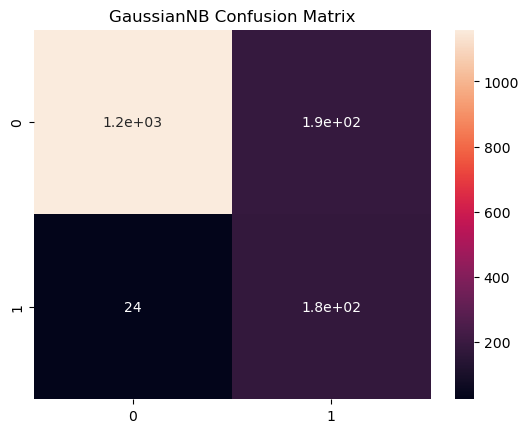

In [63]:
sns.heatmap(gaussian_con_matrix,annot=True)
plt.title('GaussianNB Confusion Matrix')
plt.show()

In [51]:
gaussion_classification_report=classification_report(y_test,gaussian_predict)
print('Gaussion Classification Report:')
print(gaussion_classification_report)

Gaussion Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1346
           1       0.49      0.88      0.63       202

    accuracy                           0.86      1548
   macro avg       0.73      0.87      0.77      1548
weighted avg       0.92      0.86      0.88      1548



### MultinomialNB Confusion Matrix 

In [52]:
multinomial_con_matrix_df=pd.DataFrame(multinomial_con_matrix,
                                   index=['True Positive','True Negative'],
                                   columns=['False Positive','False Negative'])
print(f'Multinomial Model Confusion Matrix:')
multinomial_con_matrix_df

Multinomial Model Confusion Matrix:


,False Positive,False Negative
True Positive,1325,21
True Negative,16,186


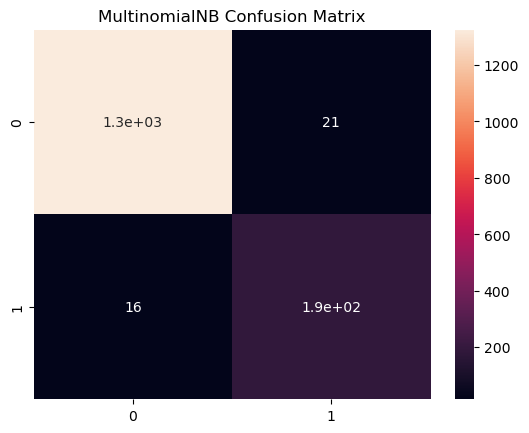

In [62]:
sns.heatmap(multinomial_con_matrix,annot=True)
plt.title('MultinomialNB Confusion Matrix')
plt.show()

In [54]:
multinomial_classification_report=classification_report(y_test,multinomial_predict)
print('Multinomial Classification Report:')
print(multinomial_classification_report)

Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1346
           1       0.90      0.92      0.91       202

    accuracy                           0.98      1548
   macro avg       0.94      0.95      0.95      1548
weighted avg       0.98      0.98      0.98      1548



### Logistic Regression Confusion matrix 

In [55]:
logistic_con_matrix_df=pd.DataFrame(logistic_con_matrix,
                                   index=['True Positive','True Negative'],
                                   columns=['False Positive','False Negative'])
print(f'Logistic Regression Confusion Matrix:')
logistic_con_matrix_df

Logistic Regression Confusion Matrix:


,False Positive,False Negative
True Positive,1345,1
True Negative,45,157


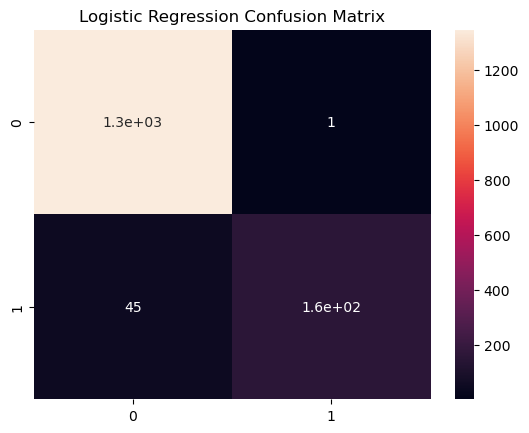

In [61]:
sns.heatmap(logistic_con_matrix,annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [56]:
logistic_classification_report=classification_report(y_test,logistic_predict)
print('Logistic Regression Classification Report:')
print(logistic_classification_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1346
           1       0.99      0.78      0.87       202

    accuracy                           0.97      1548
   macro avg       0.98      0.89      0.93      1548
weighted avg       0.97      0.97      0.97      1548



With the help of Confusion Matric and classification report:
- The Gaussian Naive Bayes model has a higher recall which is 0.85(85%) compared to the Multinomial model 0.65(65%), meaning it correctly identifies more positive cases.
- The Multinomial Naive Bayes model has a higher precision 0.98 and accuracy 0.96(96%), but its recall is lower than the Gaussian model, which means it makes fewer positive predictions, but almost all of them are correct.
- Due to imblanced data, choose model which has more precision value

# Accuracy

In [57]:
print(f'GaussianNB Accuracy: {accuracy_score(y_test,gaussian_predict )}')
print(f'MultinomialNB Accuracy: {accuracy_score(y_test, multinomial_predict)}')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, logistic_predict)}')

GaussianNB Accuracy: 0.8636950904392765
MultinomialNB Accuracy: 0.9760981912144703
Logistic Regression Accuracy: 0.9702842377260982


The Accuracy Score of MultinomialNB model and Logistic Regression is almost same but precision score of Logistic Regression is hight. Dataset contain imblanced value so select logistic regression model for testing. It indicate that Logistic Regression model perform better than MultinomialNB & GaussianNB model

# Testing Phase

In [59]:
input_mail=input('Enter Mail:')
tranform_input=[text_transform(input_mail)]
input_feature_extraction=feature_extraction.transform(tranform_input)
predection=Logistic_model.predict(input_feature_extraction)[0]
print(predection)
if(predection==1):
    print('\nSpam Mail')
else:
    print('Ham Mail')

Enter Mail:I love you... Do you love me?
0
Ham Mail
